Apsidal Motion
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
!pip install -I "phoebe>=2.3,<2.4"

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement phoebe<2.4,>=2.3 (from versions: 2.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.0.10, 2.0.11, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.1.7, 2.1.8, 2.1.9, 2.1.10, 2.1.11, 2.1.12, 2.1.13, 2.1.14, 2.1.15, 2.1.16, 2.1.17, 2.2.0, 2.2.1, 2.2.2)
ERROR: No matching distribution found for phoebe<2.4,>=2.3
You should consider upgrading via the '/usr/bin/python2 -m pip install --upgrade pip' command.


As always, let's do imports and initialize a logger and a new Bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In order for apsidal motion to be apparent, we need an eccentric system that is precessing.

In [3]:
b['ecc'] = 0.2

Let's set a very noticeable rate of precession.

In [4]:
b['dperdt'] = 2.0 * u.deg/u.d

We'll add [lc](./LC.ipynb) and [orb](./ORB.ipynb) datasets to see how the apsidal motion affects each.  We'll need to sample over several orbits of the binary (which has a period of 3 days, by default).

In [5]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('lc', times=np.linspace(4,5,101), dataset='lc02')

<ParameterSet: 43 parameters | contexts: compute, dataset, figure, constraint>

In [6]:
b.add_dataset('orb', compute_times=np.linspace(0,5,401), dataset='orb01')

<ParameterSet: 45 parameters | contexts: compute, dataset, figure, constraint>

In [7]:
b.run_compute(irrad_method='none')

100%|██████████| 570/570 [00:11<00:00, 48.98it/s]


<ParameterSet: 19 parameters | kinds: lc, orb>

Influence on Orbits (positions)
-----------------

Let's plot the orbit from above and highlight the positions of each star at each cycle (times that are multiples of the period).

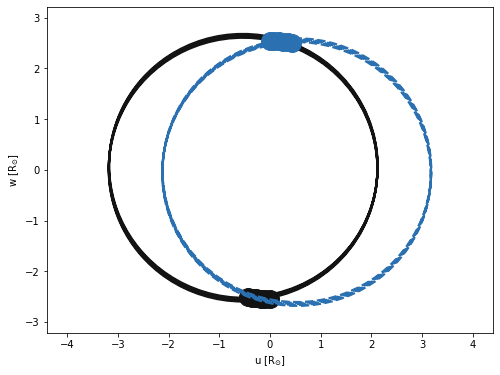

In [8]:
afig, mplfig = b['orb01@model'].plot(y='ws', time=[0,1,2,3,4,5], show=True)

Influence on Light Curves (fluxes)
-------------------

Now looking at the light curve, we can see that this is resulting in the eclipses moving in phase-space.

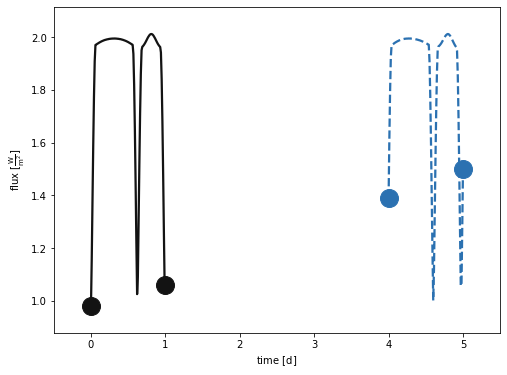

In [9]:
afig, mplfig = b['lc01@model'].plot()
afig, mplfig = b['lc02@model'].plot(time=[0,1,4,5], show=True) 

Thu, 17 Sep 2020 10:52 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.
Thu, 17 Sep 2020 10:52 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.


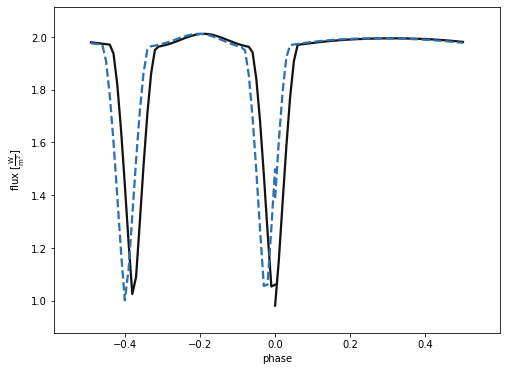

In [10]:
afig, mplfig = b['lc01@model'].plot(x='phases')
afig, mplfig = b['lc02@model'].plot(x='phases', show=True)